**Question:**
*Which serotypes are more ikely to cause death/DORB/referred/discharge?*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
import io
import pandas as pd
import seaborn as sns
import math

In [2]:
data=files.upload()

Saving Pneumococcus_2009-Present_DSH_Casebase_Data.csv to Pneumococcus_2009-Present_DSH_Casebase_Data.csv


In [18]:
df=pd.read_csv(io.StringIO(data['Pneumococcus_2009-Present_DSH_Casebase_Data.csv'].decode('utf-8')))

In [19]:
df.drop(df[df['serotype'] == 'ND'].index, inplace = True)
df.drop(df[df['serotype'] == 'NoPCV13'].index, inplace = True)
df.drop(df[df['serotype'] == 'QNS'].index, inplace = True)
df.drop(df[df['serotype'] == 'NTD'].index, inplace = True)
df.drop(df[df['serotype'] == 'NON TYPABLE'].index, inplace = True)
df.drop(columns=['year','Zila','Address','UniqueID','month','AdmDate','Age (month)','Case Definition','Discharge Date','Hospital Duration','organism'],inplace=True)
df

,Outcome,serotype
0,Discharge,1
4,DORB,2
6,Discharge,1
8,Discharge,12
9,Discharge,14
...,...,...
784,Discharge,5
785,Discharge,1
786,Discharge,1
787,Discharge,1


In [20]:
df = df.assign(severity=(df['Outcome']=='Died') | (df['Outcome']=='DORB')| (df['Outcome']=='Referred') | (df['Outcome']=='Discharge with sequella'))

In [21]:
df.severity = df.severity.replace({True: 1, False: 0})
df

,Outcome,serotype,severity
0,Discharge,1,0
4,DORB,2,1
6,Discharge,1,0
8,Discharge,12,0
9,Discharge,14,0
...,...,...,...
784,Discharge,5,0
785,Discharge,1,0
786,Discharge,1,0
787,Discharge,1,0


In [22]:
#df2 = data.groupby('serotupe')['Meningitis'].count().unstack('quad').fillna(0)
by_comp = df.groupby("serotype")
df2=by_comp.sum()

In [23]:
df2.reset_index()

,serotype,severity
0,1,7
1,10A,1
2,10A/B,0
3,10B,0
4,10F,4
...,...,...
67,7F,2
68,7F/A,0
69,8,5
70,9L,0


*Creating another dataframe*

In [24]:
df4=pd.concat([df2['severity']],axis=1)
df4.reset_index()

,serotype,severity
0,1,7
1,10A,1
2,10A/B,0
3,10B,0
4,10F,4
...,...,...
67,7F,2
68,7F/A,0
69,8,5
70,9L,0


*total data for each serotype*

In [25]:
by_comp = df.groupby("serotype")
df3=by_comp.count()
df3.reset_index()

,serotype,Outcome,severity
0,1,55,55
1,10A,5,5
2,10A/B,1,1
3,10B,2,2
4,10F,7,7
...,...,...,...
67,7F,9,9
68,7F/A,2,2
69,8,31,31
70,9L,1,1


In [26]:
df3.rename(columns = {'severity':'Total_case_except_discharge'}, inplace = True)
df3

,Outcome,Total_case_except_discharge
serotype,,
1,55,55
10A,5,5
10A/B,1,1
10B,2,2
10F,7,7
...,...,...
7F,9,9
7F/A,2,2
8,31,31


In [27]:
df4=pd.concat([df2['severity'],df3['Total_case_except_discharge']],axis=1)
df4
df4.reset_index()

,serotype,severity,Total_case_except_discharge
0,1,7,55
1,10A,1,5
2,10A/B,0,1
3,10B,0,2
4,10F,4,7
...,...,...,...
67,7F,2,9
68,7F/A,0,2
69,8,5,31
70,9L,0,1


*calculating the percentage of severity*

In [28]:
df4.assign(percentage=lambda x: x['severity']*100 /x['Total_case_except_discharge'])

,severity,Total_case_except_discharge,percentage
serotype,,,
1,7,55,12.727273
10A,1,5,20.000000
10A/B,0,1,0.000000
10B,0,2,0.000000
10F,4,7,57.142857
...,...,...,...
7F,2,9,22.222222
7F/A,0,2,0.000000
8,5,31,16.129032


In [29]:
df_6=df4.reset_index().assign(percentage=lambda x: x['severity']*100 /x['Total_case_except_discharge'])

In [30]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
te=pd.DataFrame(df_6)
te.to_excel("Assign_03_case_for_severity_.xlsx")

Importing Assign_03_case_for_severity

In [32]:
data=files.upload()

Saving Assign_03_case_for_severity.csv to Assign_03_case_for_severity.csv


In [33]:
df=pd.read_csv(io.StringIO(data['Assign_03_case_for_severity.csv'].decode('utf-8')))

In [34]:
df=df.sort_values('percentage')

In [35]:
df

,serotype,severity,Total_case_except_discharge,percentage
35,23A,0,4,0.0
39,24F,0,1,0.0
27,19B,0,1,0.0
42,3,0,4,0.0
43,33B,0,4,0.0
...,...,...,...,...
7,11F,2,2,100.0
66,7B/C,1,1,100.0
40,27,1,1,100.0
29,19a,1,1,100.0


 **after sorting serotypes with respect to percentage**

In [36]:
plt.rcParams['figure.figsize'] = [40,20]

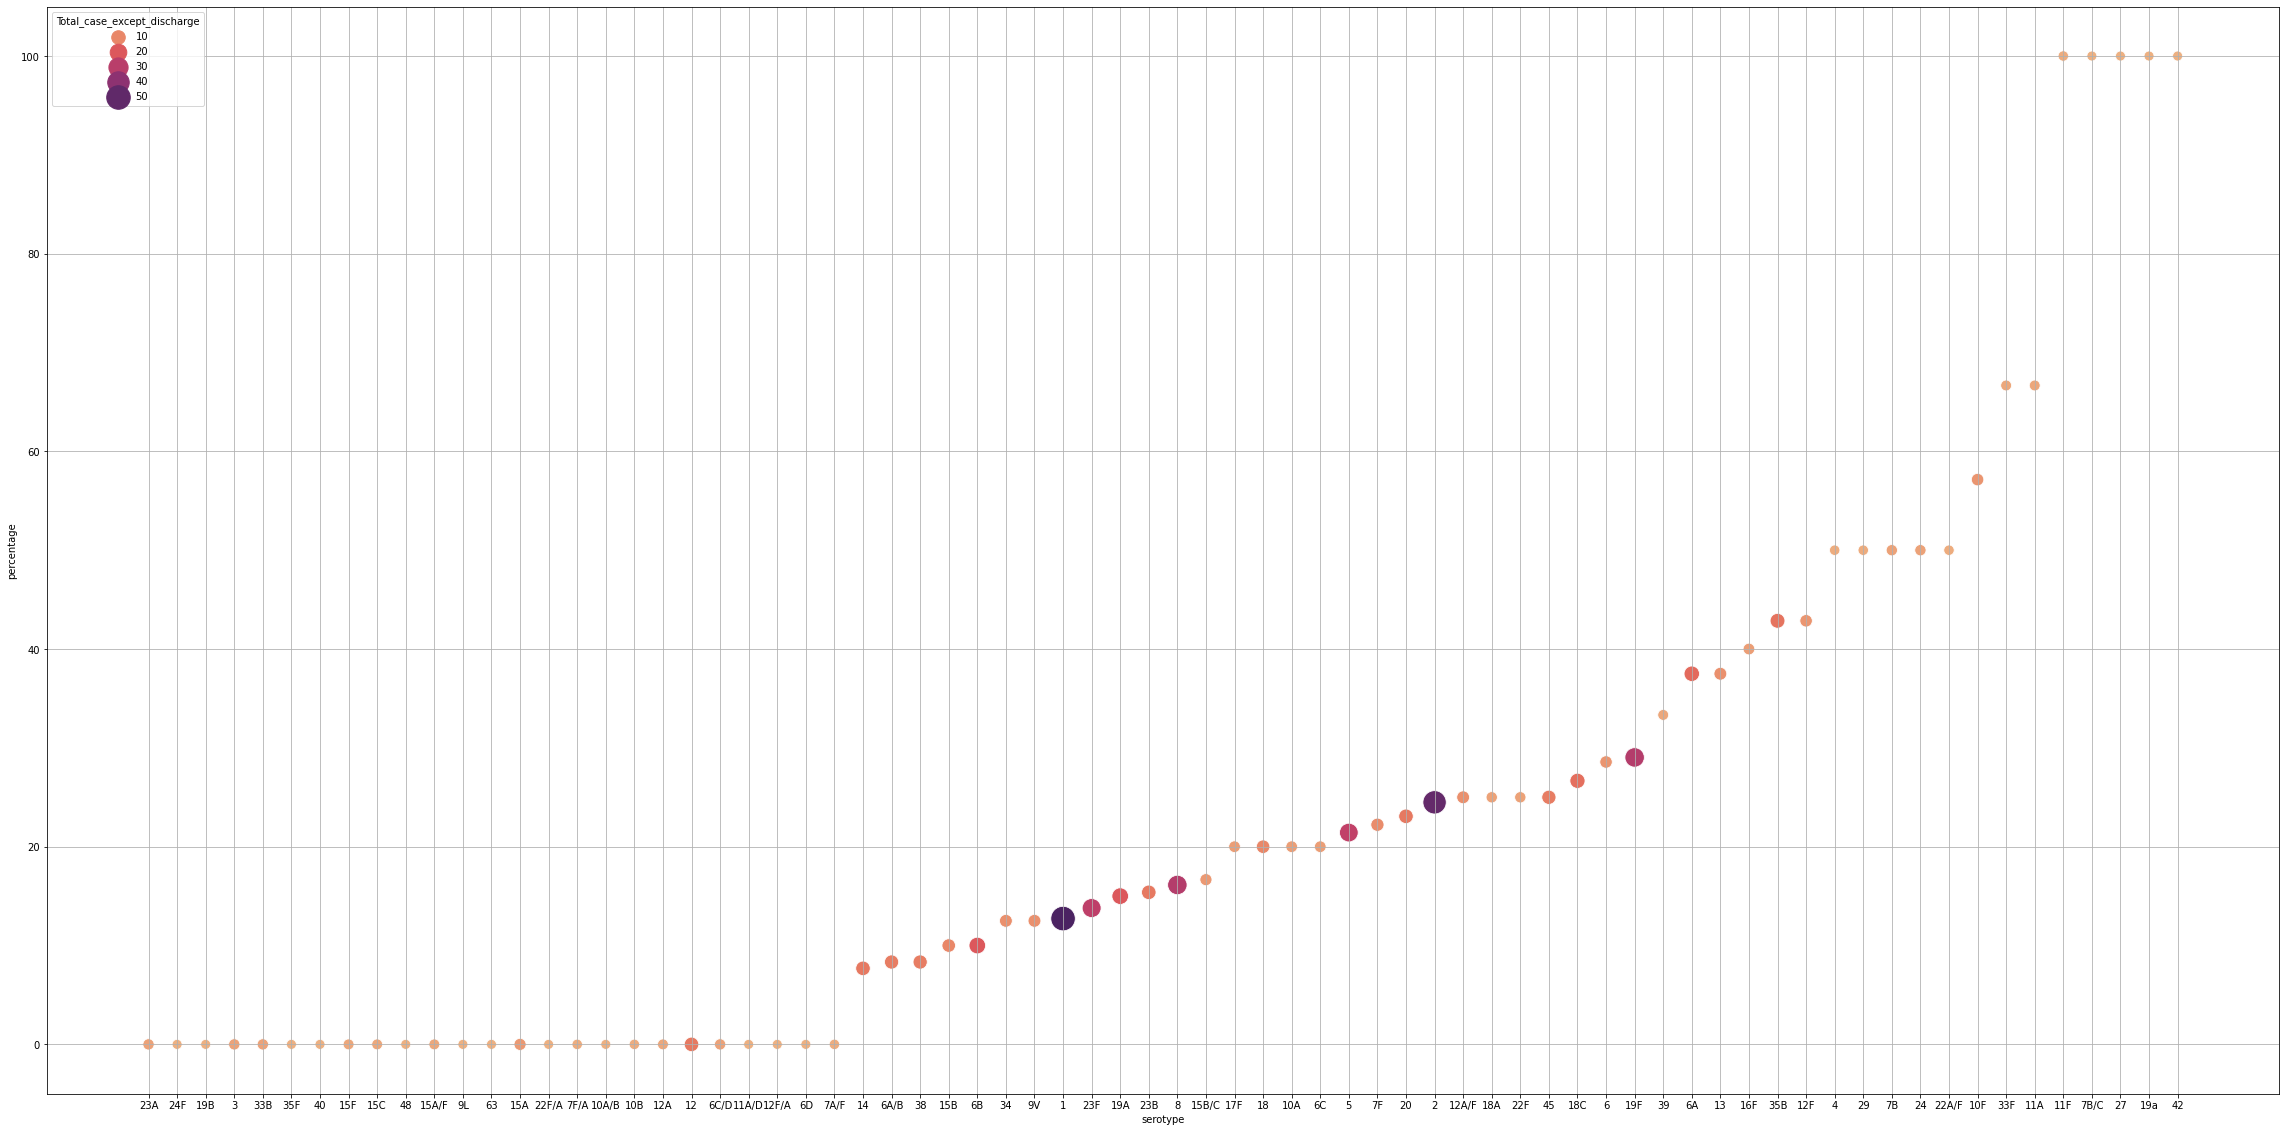

In [37]:
sns.scatterplot(data=df, x="serotype", y="percentage", hue="Total_case_except_discharge",palette="flare",size="Total_case_except_discharge",sizes=(100, 600))
plt.grid()